A binomial random variable is a discrete random variable used to calculate probabilities in a situation in which all three of the following apply:

Image n independent trials occur.

Image Each trial results in one of two outcomes: success or failure.

Image In each trial, the probability of success (p) remains constant.

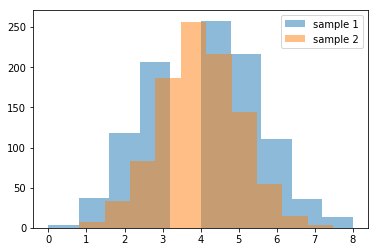

sample1 size: 1000  -  sample2 size: 1000
sample1 Mean: 4.033  -  sample2 Mean: 3.99420677098
sample1 Std: 1.51059954985  -  sample2 Std: 1.02633577965
mean diff:  -0.038793229022 se:  0.0577518496032 mean diff/se:  -0.671722711716
Ttest_indResult(statistic=-0.67138676635261574, pvalue=0.50206231510458299)


In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

# binomial(n, p, size=None)

pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.normal(4, 1, 10000) 

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 

plt.legend(loc='upper right') 
plt.show()

print("sample1 size:",len(sample1), " - ",  "sample2 size:",len(sample2))
print("sample1 Mean:",sample1.mean(), " - ", "sample2 Mean:",sample2.mean())
print("sample1 Std:",sample1.std(), " - ", "sample2 Std:",sample2.std())

mean_diff=sample2.mean() - sample1.mean()


# Calcualte the standard error of the sampling distribution of the difference of the means.

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 

diff_se = (sum(sd ** 2/size))**0.5

#The difference between the means divided by the standard error: T-value.  

print("mean diff: ",mean_diff, "se: ", diff_se, "mean diff/se: ", mean_diff/diff_se)
print(ttest_ind(sample2, sample1, equal_var=False))

Given a t-value, we can calculate the probability that a t-value at least this extreme would occur by chance, called a p-value. This tells us how likely it is that we would get the sampling data we observe if the two population means were not, in fact, different from one another. The p-value runs between 0 (It is impossible to get a difference of this size or greater in the absence of a real population difference) and 1 (we will always get a difference of this size or greater in the absence of a real population difference). The lower the p-value, the more confidently we can conclude that there is a meaningful difference between the means of the two groups in the population.